### Dataset Link

https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020

### Imports and setup

In [33]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import plotly.express as px

from google.colab import auth
auth.authenticate_user()
print('Authenticated')
%load_ext google.colab.data_table

Authenticated
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Importing data from Big Query to Colab

In [34]:
project_id = 'bionic-kiln-340418'

In [35]:
!gcloud config list
!gcloud config set project $project_id
!gcloud config list project

[component_manager]
disable_update_check = True
[core]
account = maitreyi.kunnavakkamvinjimur@sjsu.edu
project = bionic-kiln-340418

Your active configuration is: [default]
Updated property [core/project].
[core]
project = bionic-kiln-340418

Your active configuration is: [default]


In [36]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects

client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

california


#### Pulling data from BQ to analyze

In [37]:
query1 = """SELECT
  *
FROM
  california.cali_fire
        """
dfquery = client.query(query1)

In [38]:
df = dfquery.to_dataframe()
df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,240.0,False,CAL FIRE Santa Clara Unit,NaN,2013,True,/incidents/2013/6/8/vasco-fire/,None,None,Alameda,...,"Vasco Fire, June 2013, Vasco Road, North Vasco...",2013-06-08 10:16:00+00:00,Finalized,NaN,NaN,None,NaN,2ad509e4-99f1-4e1a-81eb-839f772f9c45,2013-06-08 13:25:00+00:00,NaN
1,150.0,False,CAL FIRE Santa Clara Unit,NaN,2013,True,/incidents/2013/10/4/highland-fire/,None,None,Alameda,...,"Highland FIre, October 2013, Alameda County, H...",2013-10-04 07:35:00+00:00,Finalized,NaN,NaN,None,NaN,6a48000a-6198-46dd-9a91-0b0159183145,2013-10-04 10:30:00+00:00,NaN
2,50.0,False,CAL FIRE Santa Clara Unit,NaN,2013,True,/incidents/2013/7/4/grant-fire/,None,None,Alameda,...,"Grant Fire, July 2013, Grant Line Road, I-580,...",2013-07-04 10:00:00+00:00,Finalized,NaN,NaN,None,NaN,07fb8b11-f39b-4cd0-8a27-2d4fef7fe680,2013-07-04 11:30:00+00:00,NaN
3,38.0,False,CAL FIRE Santa Clara Unit / Alameda County Fire,NaN,2013,True,/incidents/2013/7/6/fallon-fire/,None,None,Alameda,...,"Fallon Fire, July 2013, Fallon Road, Camino Ta...",2013-07-06 13:09:00+00:00,Finalized,NaN,NaN,None,NaN,4c04a4e5-f580-4e62-bb53-2575c72d29dc,2013-07-06 14:30:00+00:00,NaN
4,300.0,False,CAL FIRE Santa Clara Unit,NaN,2015,True,/incidents/2015/6/5/site-fire/,None,None,Alameda,...,"Site Fire, Corral Hollow Rd, Alameda Co., San ...",2015-06-05 20:22:00+00:00,Finalized,NaN,NaN,None,NaN,186f5cdd-aa7d-4f9e-84ae-83112801c790,2015-06-06 07:15:00+00:00,NaN
5,242.0,False,CAL FIRE Santa Clara Unit,NaN,2015,True,/incidents/2015/5/28/christensen-fire/,None,None,Alameda,...,"Christensen Fire, Christiensen Rd., Burns Rd, ...",2015-05-28 17:00:00+00:00,Finalized,NaN,NaN,None,NaN,7c162fbf-922c-4128-9e30-a1e8848e15ab,2015-05-28 10:30:00+00:00,NaN
6,53.0,False,CAL FIRE Santa Clara Unit,NaN,2015,True,/incidents/2015/6/25/tesla-fire/,None,None,Alameda,...,"Tesla Fire, Tesla, Livermore, Alameda, Alameda...",2015-06-25 16:10:00+00:00,Finalized,NaN,NaN,None,NaN,418c9abb-935a-4157-91a3-f511c197785b,2015-06-25 18:45:00+00:00,NaN
7,45.0,False,CAL FIRE Santa Clara Unit,NaN,2015,True,/incidents/2015/7/2/geary-fire/,None,None,Alameda,...,"Geary Fire, Alameda County, July 2015, 2015",2015-07-02 04:40:00+00:00,Finalized,NaN,NaN,None,NaN,a6143c76-aa03-4161-bf5e-4d8e4a1136d2,2015-07-03 20:00:00+00:00,NaN
8,211.0,False,CAL FIRE Santa Clara Unit,NaN,2016,True,/incidents/2016/6/25/grant-fire/,None,None,Alameda,...,"Grant Fire, Santa Clara",2016-06-25 16:11:00+00:00,Finalized,NaN,NaN,None,NaN,3822b8a2-1a89-40e8-b239-840cfcda7a1c,2016-06-26 07:00:00+00:00,NaN
9,200.0,False,California National Guard,NaN,2017,False,/incidents/2017/8/22/range-fire/,None,None,Alameda,...,"Range Fire, Alameda County, Camp Parks Dublin,...",2017-08-22 14:00:00+00:00,Finalized,NaN,NaN,None,NaN,89b5d4db-ce4e-43b9-8618-f89088d35ee1,2018-01-09 12:44:00+00:00,NaN


### Data Exploration

The dataset has 1636 wildfire incidents over the course of 2013 to 2019. There are 40 features for the incident. 

In [39]:
df.shape

(1636, 40)

In [40]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1633 non-null   float64            
 1   Active                1636 non-null   bool               
 2   AdminUnit             1636 non-null   object             
 3   AirTankers            28 non-null     float64            
 4   ArchiveYear           1636 non-null   int64              
 5   CalFireIncident       1636 non-null   bool               
 6   CanonicalUrl          1636 non-null   object             
 7   ConditionStatement    284 non-null    object             
 8   ControlStatement      111 non-null    object             
 9   Counties              1636 non-null   object             
 10  CountyIds             1636 non-null   int64              
 11  CrewsInvolved         171 non-null    float64            
 12  Dozers

Now let's figure out the distribution and count of the given data better. 


In [42]:
df.describe()

,AcresBurned,AirTankers,ArchiveYear,CountyIds,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,1.636000e+03,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,2.724715e+04,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,522.800000,7.815068
std,27266.337722,6.399818,1.845340,3.880065e+05,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,739.586856,12.719251
min,0.000000,0.000000,2013.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,1.700000e+01,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,3.300000e+01,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,4.300000e+01,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,6.111723e+06,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,2600.000000,79.000000


In [43]:
df['Active'].value_counts()

False    1636
Name: Active, dtype: int64

### Dropping duplicate rows

In [44]:
df = df.drop_duplicates(subset=['Name', 'Started', 'AcresBurned','StructuresDamaged', 'StructuresDestroyed'], keep='first', inplace=False, ignore_index=False).reset_index().drop(columns=['index'])

### Analyzing Time duration of fire

In [45]:
df['Duration'] = (pd.to_datetime(df.Extinguished) - pd.to_datetime(df.Started)).astype('timedelta64[h]')/24

In [46]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders', 'Duration'],
      dtype='object')

In [47]:
df['Duration'].describe()

count     1550.000000
mean        84.549758
std        883.374905
min     -17052.000000
25%          1.750000
50%         19.958333
75%        170.822917
max      17900.708333
Name: Duration, dtype: float64

In [48]:
df[df.Duration < 0]['Duration'].count()

28

In [49]:
IncorrectDuration = df[(df.Duration < 0) | (df.Duration > 200)]['Duration']

In [50]:
IncorrectDuration.count()

235

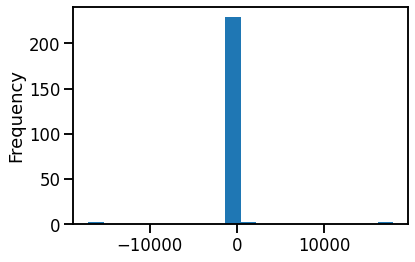

In [51]:
IncorrectDuration.plot.hist(bins=20)

In [52]:
df.drop(df[(df.Duration < 0) | (df.Duration > 200)].index, inplace=True)

In [53]:
df['Duration'].describe()

count    1315.000000
mean       62.121610
std        74.011726
min         0.000000
25%         1.291667
50%         7.958333
75%       136.875000
max       199.875000
Name: Duration, dtype: float64

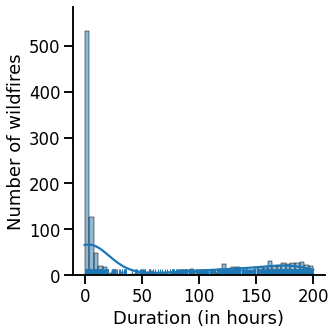

In [54]:
sns.displot(df['Duration'], bins=50, kde=True, rug=True)
plt.ylabel('Number of wildfires')

plt.xlabel('Duration (in hours)')
plt.savefig("wfduration.pdf")

### Analyzing area of fire

In [55]:
df[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,1374.000000,1374.000000
mean,37.476997,-106.702798
std,147.706081,38.868364
min,-120.258000,-124.196290
25%,34.166817,-121.790070
50%,37.222583,-120.487510
75%,39.167370,-117.443875
max,5487.000000,118.908200


In [56]:
df.drop(df[(df.Latitude < -90) | (df.Latitude > 90)].index, inplace=True)
df.drop(df[(df.Longitude < -180) | (df.Longitude >= 0)].index, inplace=True)

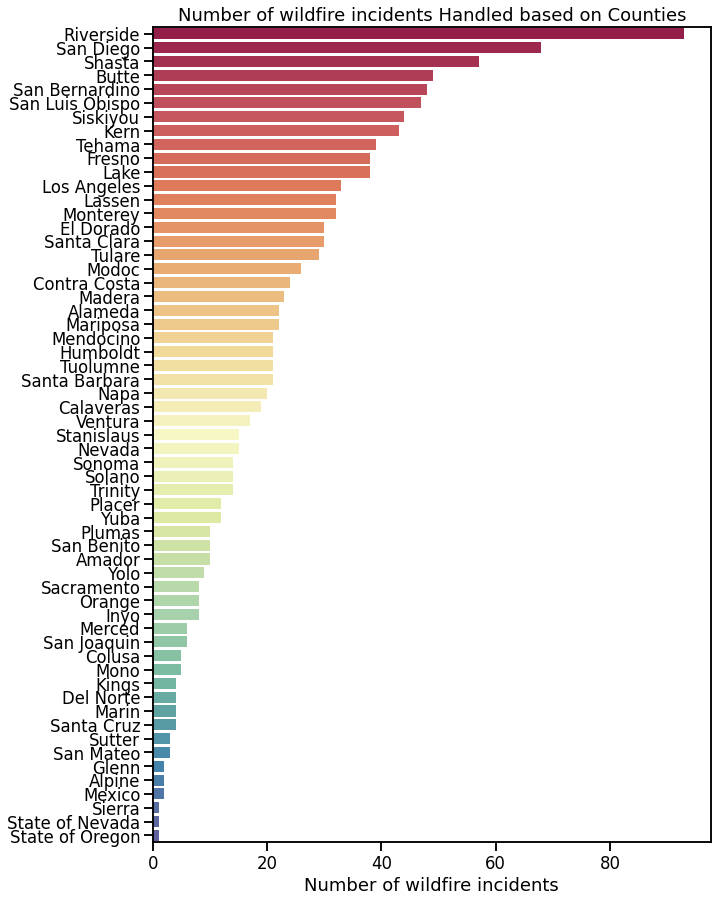

In [57]:
admin_indx = df["Counties"].value_counts().index
admin_count = df["Counties"].value_counts().values

plt.figure(figsize=(10,15))
sns.set_context("talk")
sns.barplot( x = admin_count, y=admin_indx, palette  = "Spectral")
plt.xticks(rotation = 0)
plt.title('Number of wildfire incidents Handled based on Counties')
plt.xlabel('Number of wildfire incidents')
plt.savefig("wfadminZone.pdf")

### Analyzing Adminstative unit performing relief 

The most wildfire prone regions handle at a maximum of 80-120 wildfires.


Looking at the administrative zones for the California Fire Dept. (shown below) we observe that the Sanoma Lake, Santa Clara, and Shasta-Trinity Unit are the top three administrative zones dealing with fire.

In [58]:
print(f"Number of Admin Units : {len(df['AdminUnit'].unique())}")

Number of Admin Units : 417


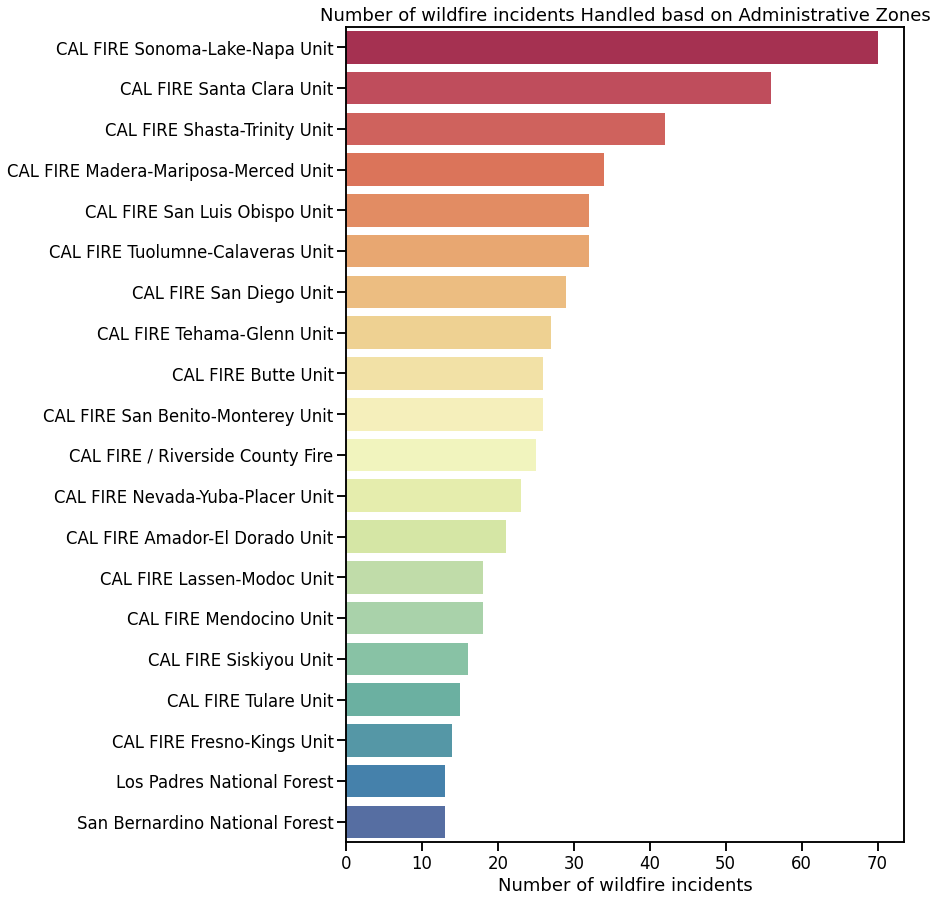

In [59]:
admin_indx = df["AdminUnit"].value_counts().index[:20]
admin_count = df["AdminUnit"].value_counts().values[:20]

plt.figure(figsize=(10,15))
sns.set_context("talk")
sns.barplot( x = admin_count, y=admin_indx, palette  = "Spectral")
plt.xticks(rotation = 0)
plt.title('Number of wildfire incidents Handled basd on Administrative Zones')
plt.xlabel('Number of wildfire incidents')
plt.savefig('wf_incidents_handled_adminZone.pdf')

### Density of fire incidents 

* Major wildfire incidents have mostly occured near regions of large population density and mostly concentrated towards South Eastern regions (San Diego and Riverside) and above San Fransico. 


* Wildfires since 2017 have been mostly concentrated in the same regions which vastly span the state of California. These regions have now been identified (in 2018) as priority landscapes for reducing wildfire risks.

In [61]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='AcresBurned', radius=10,
                        center=dict(lat=36, lon=-120), zoom=4,
                        mapbox_style="stamen-terrain")
fig.show()
fig.write_image("wf_acres_burned.pdf")


### Personell's Involved and Fatalities in Wildfires

In [62]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='PersonnelInvolved', radius=10,
                        center=dict(lat=36, lon=-120), zoom=4,
                        mapbox_style="stamen-terrain")
fig.show()
fig.write_image("wf_personnel_involved_lat_long.pdf")

In [74]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Fatalities', radius=10,
                        center=dict(lat=36, lon=-120), zoom=4,
                        mapbox_style="stamen-terrain")
fig.show()
fig.write_image("wf_fatalities_lat_long.pdf")

### Most year where incidents occured 

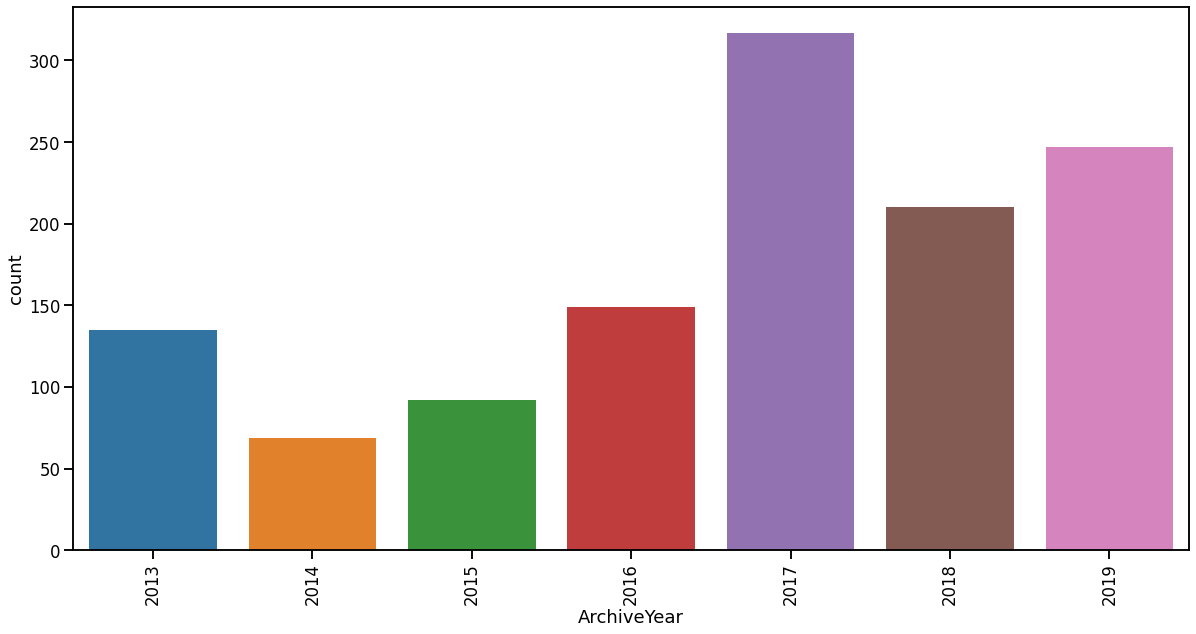

In [75]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(x=df['ArchiveYear'])
plt.savefig("yearly_trends.pdf")

### Acres Burned vs no of wildfires

Are the acres burned directly related to no of wildfires.
No, as 2018 #wildfires is lesser than 2017 yet the acres burned is much more.

In [65]:
df['AcresBurned'].describe()

count      1216.000000
mean       3522.877467
std       19433.086415
min           0.000000
25%          40.000000
50%         106.000000
75%         472.250000
max      410203.000000
Name: AcresBurned, dtype: float64

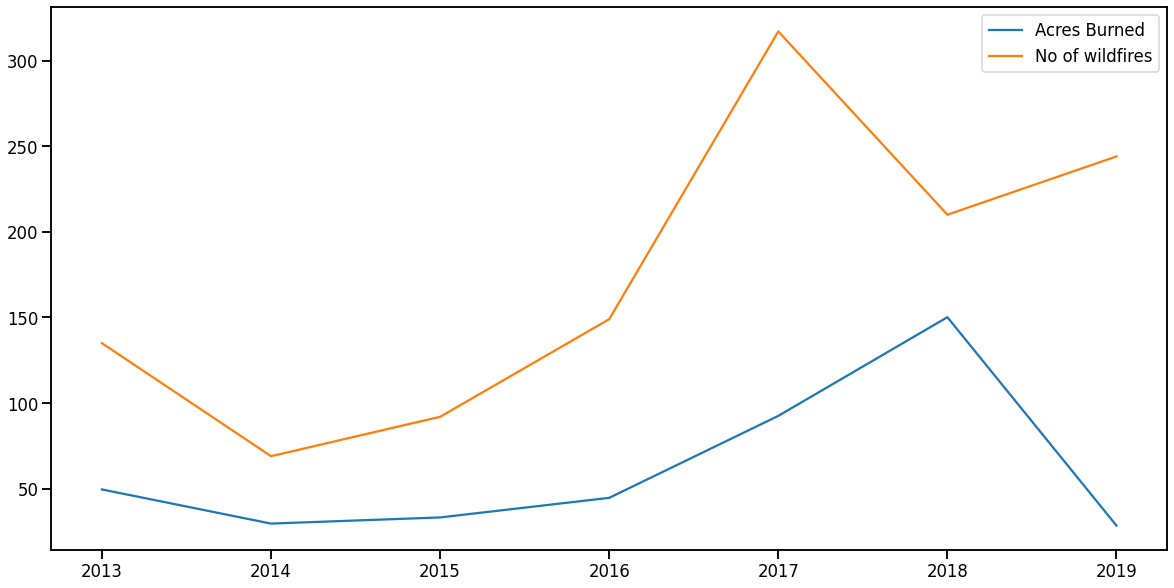

In [76]:
yearly_trends = df.groupby(['ArchiveYear'])['AcresBurned']
plt.figure(figsize=(20, 10))
plt.plot(yearly_trends.sum()/10000, label="Acres Burned")
plt.plot(yearly_trends.count(), label="No of wildfires")  
plt.legend()
plt.savefig("Correlation between area burned and no of wildfires.pdf")

### Water tenders

In [68]:
water_tenders = df[df['WaterTenders'] > 0]

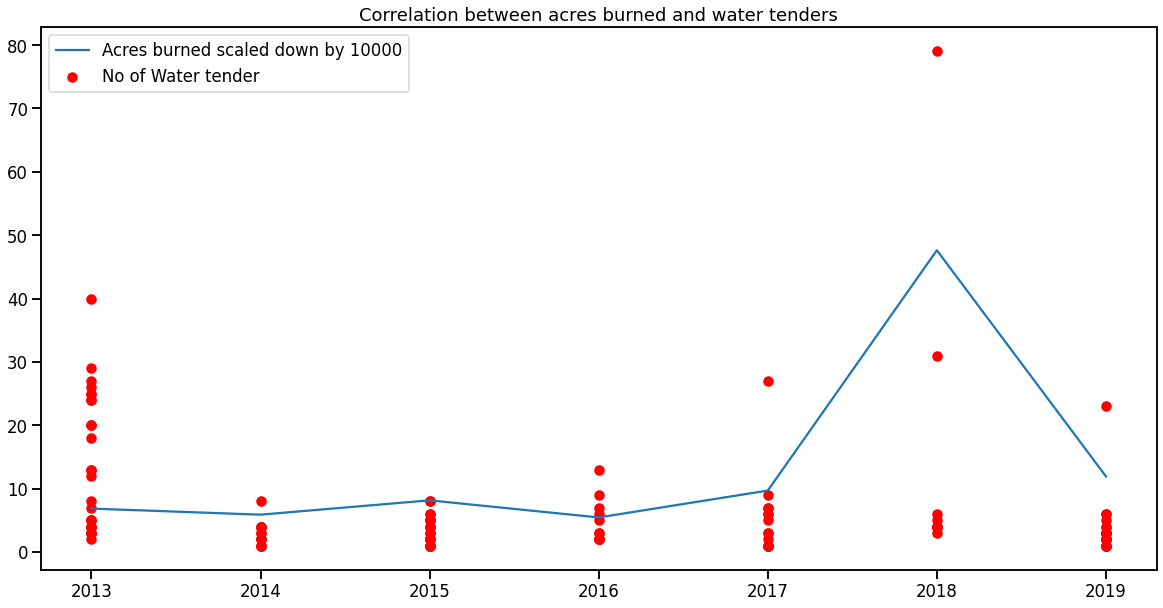

In [79]:
plt.figure(figsize=(20, 10))
plt.scatter(water_tenders['ArchiveYear'], water_tenders['WaterTenders'], c="red", label="No of Water tender")
plt.plot(water_tenders.groupby('ArchiveYear')['AcresBurned'].sum()/10000, label="Acres burned scaled down by 10000")
plt.legend()
plt.title("Correlation between acres burned and water tenders")
plt.savefig("Correlation between acres burned and water tenders.pdf")

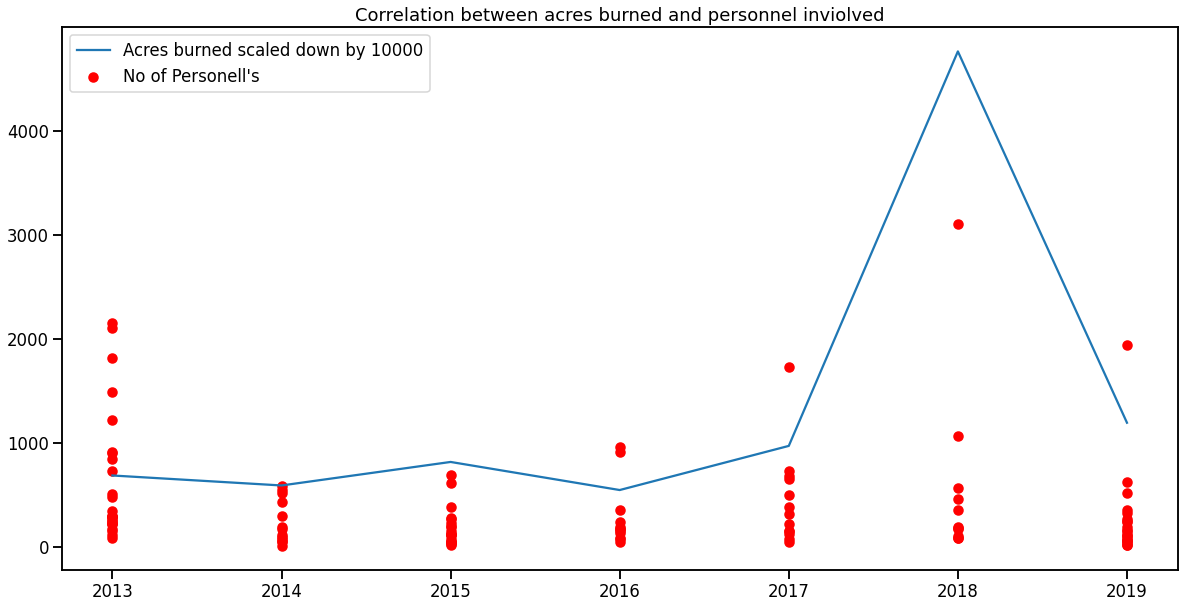

In [80]:
plt.figure(figsize=(20, 10))
plt.scatter(water_tenders['ArchiveYear'], water_tenders['PersonnelInvolved'], c="red", label="No of Personell's")
plt.plot(water_tenders.groupby('ArchiveYear')['AcresBurned'].sum()/100, label="Acres burned scaled down by 10000")
plt.legend()
plt.title("Correlation between acres burned and personnel inviolved")
plt.savefig("Correlation between acres burned and personnel inviolved.pdf")

### Correlations between parameters

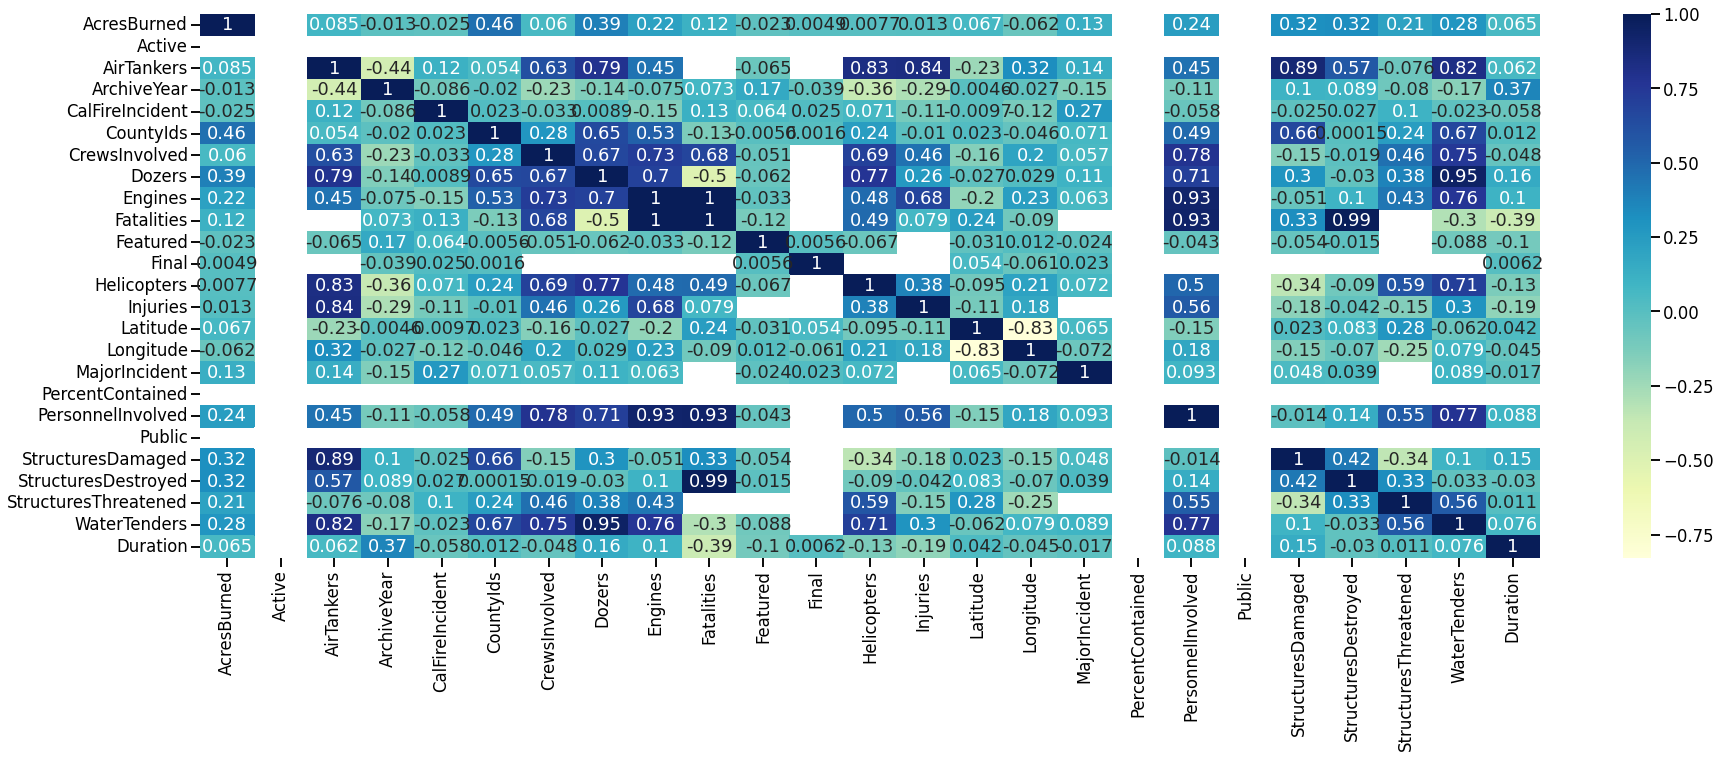

In [81]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.savefig("Correlation overall.pdf")

### Correlations select parameters

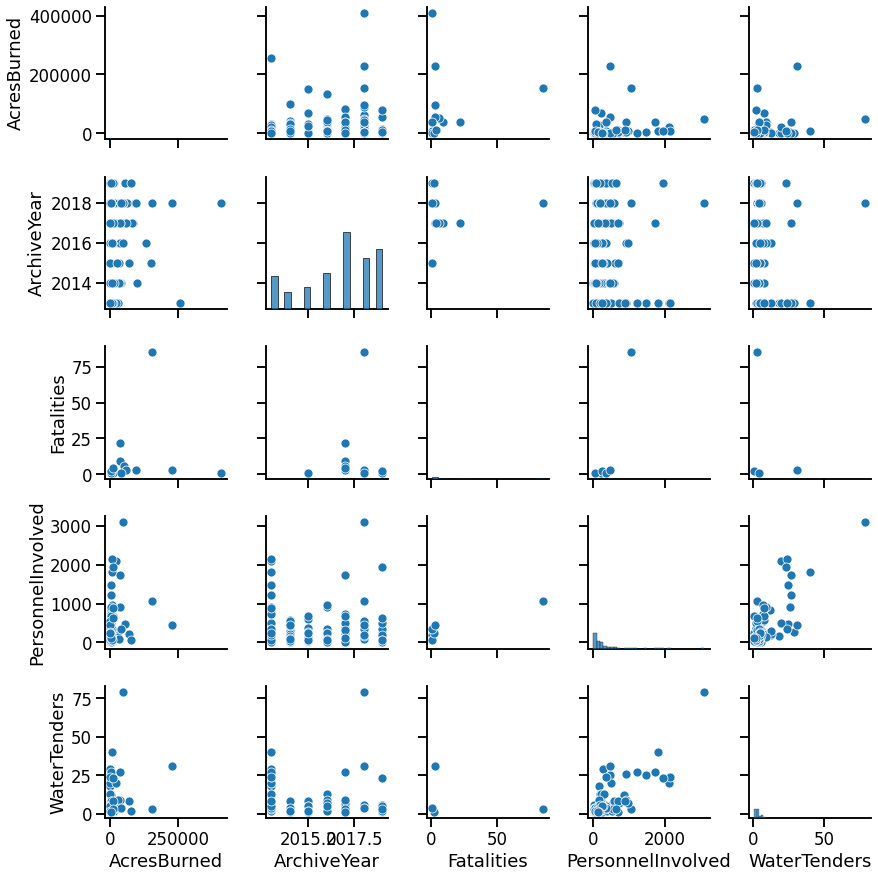

In [87]:
selected_columns = [
    'AcresBurned',
    'ArchiveYear',
    'Fatalities',
    'PersonnelInvolved',
    'WaterTenders'
]

sns.pairplot(df[selected_columns])
plt.savefig("Correlation pair plot overall.pdf") 

### Writing data back to BQ

In [82]:
import time

start = time.time()
df.to_gbq('california.fire_post_processing', 
                 project_id,
                 chunksize=10000, 
                 if_exists='replace')
end = time.time()
print("time alternative 1 " + str(end - start))

1it [00:04,  4.33s/it]

time alternative 1 6.556621313095093
